# Hdf5, images and numpy arrays

#### In this exercise, you will learn to read some data from a custom made hdf5 file, plot the data, and obtain some useful statistics.

In [7]:
# some things we need in general for this exercise
import numpy as np
import matplotlib.pyplot as plt

# some things needed to read. we're using hdf5
import h5py

%matplotlib inline

### Exercise 1:
    - Read data from an hdf5 file
    - use the h5py library to read data from an hdf5 that has the following structure:
        - img: the image (a 2d numpy array)
        - mask : the mask for the image (a 2d numpy array)
        - attributes/
            - x0 : the beam center in x
            - y0 : the beam center in y
            - more keys...

Try it yourself by exploring the following commands:
```py
f = h5py.File(filename)
img = f['img'].value
import matplotlib.pyplot as plt
plt.ion()
plt.imshow(img)

attributes = f['attributes']
print(list(attributes.keys()))

d = dict()
for key in attributes:
    d[key] = attributes[key].value
```

Now try to make a function that returns
(img, mask, attributes)

See the solution if you would rather move on

In [8]:
# %load ../solutions/solution01-part01.py
# SOLUTION
def read_data(filename):
    '''
        Reads data from hdf5 file of data.

    '''
    # this is the way to open an hdf5 file for reading
    f = h5py.File(filename, "r")
    # accessing a data set is just like accessing as a dictionary
    mask = f['mask'].value
    img = f['img'].value
    # for groups (which are groups of data sets, we can access them the same
    # way)
    attributes = f['attributes']
    # we can grab all the keys from the attributes as so
    keys = attributes.keys()
    # note that this is an iterator, call list(keys) to see the keys
    # we'll do it here just to be explicit (but this step is not necessary)
    keys = list(keys)

    md = dict()
    # iterate over the keys
    for key in keys:
        # access the attribute like a dictionary
        # alternately, this also works: f['attributes/beam_center_x'] etc
        # (but the current implementation is simpler)
        md[key] = attributes[key].value

    return img, mask, md

# if running from the notebooks directory:
img, mask, md = read_data("../data/00000000.hd5")


### Exercise 2

Look at the image, explore it.


Use commands like:
    
```
    plt.figure() # select a figure
    plt.imshow(img)
```

play with the max and min in the colorscale:
```
plt.clim(0,100)
```

In [9]:
# try it yourself here




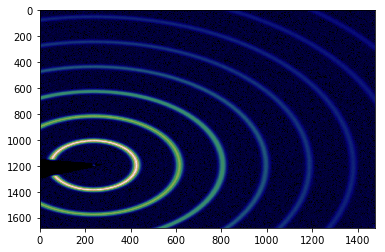

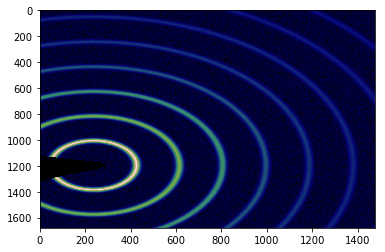

In [10]:
# %load ../solutions/solution01-part02.py
plt.figure(2);


plt.clf(); # clear figure in case it's been drawn before
plt.imshow(img)

# use mask to mask out bad pixels
plt.figure(3);
plt.clf(); # clear figure in case it's been drawn before
plt.imshow(img*mask)

Exercise 3: Plot rings around the mask.

    - First, use the information md['x0'] and md['y0'] to plot the beam center
    - Second, try to plot rings around the beam center. Do they seem to match
    the data?
    
Hints, to plot a ring of radius 1:
```
phi = np.linspace(0, 2*np.pi, 1000)
plot(np.cos(phi), np.sin(phi))
```

How about a ring of radius 10, 100, 200, 300, 400, 500?

How about a ring centered at (10,10)?


In [11]:
# try it yourself here

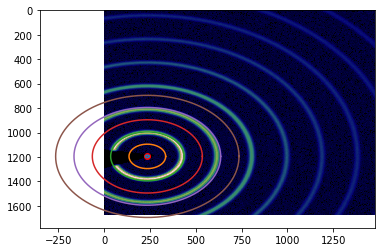

In [12]:
# %load ../solutions/solution01-part03.py
# SOLUTION

x0, y0 = md['x0'], md['y0']

plt.figure(4);
plt.clf()
plt.imshow(img)

# plot the beam center
plt.plot(x0, y0, 'ro')
# create phi
phi = np.linspace(0, 2*np.pi, 1000)
# now plot phi for a certain radius
for r in [10, 100, 200, 300, 400, 500]:
    plt.plot(r*np.cos(phi) + x0, r*np.sin(phi) + y0)

### Exercise 4: Rings look good? Great! Let's learn about histogramming data

#### Each pixel in an image is part of a certain radius. Here is each radius